# Antone Evans Jr. | Final Project


## Fake vs. Real News using CNN and RNN Models

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
import zipfile, os

#Loading Data

Dataset: https://ieee-dataport.org/open-access/fnid-fake-news-inference-dataset

In [ ]:
#Getting the Data
# downloading the files from dropbox
!wget --no-check-certificate  "https://uofi.box.com/shared/static/fen4hwjlhhs8hk37e8kwl00y6gi3ww5u.zip" -O FNID-dataset.zip

#extract the zip file downloaded
zip_ref = zipfile.ZipFile('FNID-dataset.zip', 'r')
zip_ref.extractall()

--2020-11-30 16:21:15--  https://uofi.box.com/shared/static/fen4hwjlhhs8hk37e8kwl00y6gi3ww5u.zip
Resolving uofi.box.com (uofi.box.com)... 185.235.236.197
Connecting to uofi.box.com (uofi.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/fen4hwjlhhs8hk37e8kwl00y6gi3ww5u.zip [following]
--2020-11-30 16:21:15--  https://uofi.box.com/public/static/fen4hwjlhhs8hk37e8kwl00y6gi3ww5u.zip
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/fen4hwjlhhs8hk37e8kwl00y6gi3ww5u.zip [following]
--2020-11-30 16:21:16--  https://uofi.app.box.com/public/static/fen4hwjlhhs8hk37e8kwl00y6gi3ww5u.zip
Resolving uofi.app.box.com (uofi.app.box.com)... 185.235.236.201
Connecting to uofi.app.box.com (uofi.app.box.com)|185.235.236.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.b

In [ ]:
fnn_train = pd.read_csv("/content/dataset/fake news detection(FakeNewsNet)/fnn_train.csv")
fnn_train.label_fnn.unique()

array(['fake', 'real'], dtype=object)

In [ ]:
fnn_test = pd.read_csv("/content/dataset/fake news detection(FakeNewsNet)/fnn_test.csv")
fnn_test.label_fnn.unique()

array(['real', 'fake'], dtype=object)

In [ ]:
fnn_dev = pd.read_csv("/content/dataset/fake news detection(FakeNewsNet)/fnn_dev.csv")
fnn_dev.label_fnn.unique()

array(['fake', 'real'], dtype=object)

In [ ]:
fnn_dev.count()

id                         1058
date                       1058
speaker                    1058
statement                  1058
sources                    1058
paragraph_based_content    1058
fullText_based_content     1058
label_fnn                  1058
dtype: int64

In [ ]:
liar_train = pd.read_csv("/content/dataset/fake news detection(LIAR)/liar_train.csv")
liar_train['label-liar'].unique()

array(['barely-true', 'pants-fire', 'half-true', 'mostly-true', 'true',
       'false'], dtype=object)

In [ ]:
liar_test = pd.read_csv("/content/dataset/fake news detection(LIAR)/liar_test.csv")
liar_test['label-liar'].unique()

array(['half-true', 'mostly-true', 'true', 'false', 'pants-fire',
       'barely-true'], dtype=object)

In [ ]:
liar_dev = pd.read_csv("/content/dataset/fake news detection(LIAR)/liar_dev.csv")
liar_dev['label-liar'].unique()

array(['half-true', 'false', 'barely-true', 'mostly-true', 'true',
       'pants-fire'], dtype=object)

In [ ]:
liar_dev.count()

id                         1265
date                       1265
speaker                    1265
statement                  1265
sources                    1265
paragraph_based_content    1265
fullText_based_content     1265
label-liar                 1265
dtype: int64

## Data Exploration and Data Cleaning 

### Concatenating columns to create an overall training and testing dataset

In [ ]:
fnn_newTest = pd.concat([fnn_test,fnn_dev]) 
liar_newTest = pd.concat([liar_test,liar_dev]) 
print("FNN Count",fnn_newTest.count())
print("Liar Count",liar_newTest.count())

FNN Count id                         2112
date                       2112
speaker                    2112
statement                  2112
sources                    2112
paragraph_based_content    2112
fullText_based_content     2112
label_fnn                  2112
dtype: int64
Liar Count id                         2531
date                       2531
speaker                    2531
statement                  2531
sources                    2531
paragraph_based_content    2531
fullText_based_content     2531
label-liar                 2531
dtype: int64


### Changing label-liar and FakeNewsNet real or fake labels to reflect the same 

In [ ]:
liar_train.loc[liar_train['label-liar'] == 'barely-true', 'label'] = 1 
liar_train.loc[liar_train['label-liar'] == 'pants-fire', 'label'] = 0  
liar_train.loc[liar_train['label-liar'] == 'half-true', 'label'] = 1 
liar_train.loc[liar_train['label-liar'] == 'mostly-true', 'label'] = 1  
liar_train.loc[liar_train['label-liar'] == 'true', 'label'] = 1 
liar_train.loc[liar_train['label-liar'] == 'false', 'label'] = 0 

In [ ]:
liar_train['label'] = liar_train['label'].astype(int) 

In [ ]:
liar_train.head(5)

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label-liar,label
0,18178,2020-03-18T13:26:42-04:00,Instagram posts,"""COVID-19 started because we eat animals.""",['https://www.cdc.gov/coronavirus/2019-ncov/ca...,['Vegan Instagram users are pinning the 2019 c...,Vegan Instagram users are pinning the 2019 cor...,barely-true,1
1,3350,2011-03-04T09:12:59-05:00,Glenn Beck,Says Michelle Obama has 43 people on her staff...,['http://www.glennbeck.com/2011/02/25/while-wo...,['Glenn Beck rekindled a falsehood about the s...,Glenn Beck rekindled a falsehood about the siz...,pants-fire,0
2,14343,2017-07-21T11:52:44-04:00,Mike Pence,"Says President Donald Trump ""has signed more l...",['https://nrf.com/events/retail-advocates-summ...,['Vice President Mike Pence says that when it ...,Vice President Mike Pence says that when it co...,half-true,1
3,15579,2018-07-10T15:52:26-04:00,Bloggers,"""US representatives promise implement of UN gu...",['https://conservativedailypost.com/us-represe...,['A conservative website falsely claimed that ...,A conservative website falsely claimed that U....,barely-true,1
4,3690,2011-05-04T16:31:24-04:00,National Republican Congressional Committee,"""The federal government borrows $4 billion eve...",['http://www.politifact.com/georgia/statements...,['Hundreds of Rhode Islanders got phone calls ...,Hundreds of Rhode Islanders got phone calls la...,mostly-true,1


In [ ]:
liar_newTest.loc[liar_newTest['label-liar'] == 'barely-true', 'label'] = 1 
liar_newTest.loc[liar_newTest['label-liar'] == 'pants-fire', 'label'] = 0  
liar_newTest.loc[liar_newTest['label-liar'] == 'half-true', 'label'] = 1 
liar_newTest.loc[liar_newTest['label-liar'] == 'mostly-true', 'label'] = 1  
liar_newTest.loc[liar_newTest['label-liar'] == 'true', 'label'] = 1 
liar_newTest.loc[liar_newTest['label-liar'] == 'false', 'label'] = 0 

In [ ]:
liar_newTest['label'] = liar_newTest['label'].astype(int) 

In [ ]:
liar_newTest.head(5)

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label-liar,label
0,1894,2010-06-15T10:16:14-04:00,Donna Brazile,Ninety percent of the people in Arkansas still...,['http://abcnews.go.com/ThisWeek/week-transcri...,"[""Sen. Blanche Lincoln's narrow victory in th...",Sen. Blanche Lincoln's narrow victory in the ...,half-true,1
1,1648,2010-04-01T13:34:21-04:00,Barack Obama,"""A lot of the ideas in terms of the (health in...",['http://today.msnbc.msn.com/id/36096371/ns/to...,"[""Democrats like to parry Republican criticism...",Democrats like to parry Republican criticism o...,mostly-true,1
2,1576,2010-03-12T11:45:14-05:00,America's Health Insurance Plans,"""Health insurance companies' costs are only 4 ...","['http://www.youtube.com/watch?v=4O8CxZ1OD58',...","[""As the battle over health care reform approa...",As the battle over health care reform approach...,true,1
3,1679,2010-04-11T17:59:45-04:00,Robert Gates,"""The policy of the Bush administration was als...",['http://abcnews.go.com/ThisWeek/video/nuclear...,['The Nuclear Posture Review released by the O...,The Nuclear Posture Review released by the Oba...,half-true,1
4,1849,2010-06-04T20:23:04-04:00,John Oxendine,"""We have SAT scores lower than that of Alabama.""",['http://nces.ed.gov/programs/digest/d09/table...,"[""In a video on his campaign Web site, guberna...","In a video on his campaign Web site, gubernato...",half-true,1


In [ ]:
fnn_train.loc[fnn_train['label_fnn'] == 'real', 'label'] = 1 
fnn_train.loc[fnn_train['label_fnn'] == 'fake', 'label'] = 0 

In [ ]:
fnn_train['label'] = fnn_train['label'].astype(int) 

In [ ]:
fnn_train.head(5)

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn,label
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake,0
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake,0
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake,0
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real,1
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake,0


In [ ]:
fnn_newTest.loc[fnn_newTest['label_fnn'] == 'real', 'label'] = 1 
fnn_newTest.loc[fnn_newTest['label_fnn'] == 'fake', 'label'] = 0 

In [ ]:
fnn_newTest['label'] = fnn_newTest['label'].astype(int) 

In [ ]:
fnn_newTest.head(5)

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn,label
0,1678,2010-04-11T16:37:40-04:00,Jon Kyl,"""President Obama himself attempted to filibust...",['http://abcnews.go.com/ThisWeek/video/supreme...,['U.S. Supreme Court Justice John Paul Stevens...,U.S. Supreme Court Justice John Paul Stevens a...,real,1
1,1820,2010-05-23T18:11:09-04:00,Michael Steele,"In Hawaii, ""they don't have a history of throw...",['http://www.starbulletin.com/news/bulletin/94...,"[""On ABC's This Week, the chairmen of the Repu...","On ABC's This Week, the chairmen of the Republ...",real,1
2,1624,2010-03-26T10:24:21-04:00,John Boehner,"""Our national debt ... is on track to exceed t...",['http://www.desmoinesregister.com/article/201...,['Ever since Barack Obama became president and...,Ever since Barack Obama became president and b...,real,1
3,1576,2010-03-12T11:45:14-05:00,America's Health Insurance Plans,"""Health insurance companies' costs are only 4 ...","['http://www.youtube.com/watch?v=4O8CxZ1OD58',...","[""As the battle over health care reform approa...",As the battle over health care reform approach...,real,1
4,1770,2010-05-07T11:54:44-04:00,Michael Bloomberg,"""We can prevent terror suspects from boarding ...",['http://www.huffingtonpost.com/michael-bloomb...,['In the wake of a foiled car bomb attempt in ...,In the wake of a foiled car bomb attempt in Ti...,real,1


### Saving the test and train from both Liar and FakeNewsNet into its respective dataframe

### Also, saving all dataframes into an overall dataframe for visualization 

In [ ]:
test = pd.concat([fnn_newTest,liar_newTest]) 
train = pd.concat([fnn_train,liar_train]) 
overall = pd.concat([fnn_train,liar_train,fnn_newTest,liar_newTest])

### Categrical Vs. Categrical Variables

In [ ]:
overall_dataExplore = overall
overall_dataExplore.loc[overall_dataExplore['label'] == 0, 'new-label'] = 'fake'
overall_dataExplore.loc[overall_dataExplore['label'] == 1, 'new-label'] = 'real'
overall_dataExplore.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn,label,label-liar,new-label
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake,0,NaN,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake,0,NaN,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake,0,NaN,fake
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real,1,NaN,real
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake,0,NaN,fake


In [ ]:
from scipy import stats

In [ ]:
contingency_table=pd.crosstab(overall_dataExplore["new-label"],overall["date"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 date       2007-05-02T00:00:00-04:00  ...  2020-04-24T18:17:43-04:00
new-label                             ...                           
fake                               0  ...                          2
real                               2  ...                          0

[2 rows x 16351 columns]
Observed Values :-
 [[0 0 2 ... 2 0 2]
 [2 2 4 ... 0 2 0]]
Expected Values :-
 [[0.82378892 0.82378892 2.47136677 ... 0.82378892 0.82378892 0.82378892]
 [1.17621108 1.17621108 3.52863323 ... 1.17621108 1.17621108 1.17621108]]
Degree of Freedom:- 1
chi-square statistic:- 2.8015003166252614
critical_value: 3.841458820694124
p-value: 0.09417614499933269
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2.8015003166252614
critical_value: 3.841458820694124
p-value: 0.09417614499933269
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [ ]:
contingency_table=pd.crosstab(overall_dataExplore["new-label"],overall["speaker"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 speaker       My City Bikes  ...  worldnewsdailyreport.com
new-label                    ...                          
fake                      4  ...                         8
real                      0  ...                         0

[2 rows x 4228 columns]
Observed Values :-
 [[ 4  7  2 ...  2  2  8]
 [ 0 13  0 ...  0  0  0]]
Expected Values :-
 [[ 1.64757785  8.23788925  0.82378892 ...  0.82378892  0.82378892
   3.2951557 ]
 [ 2.35242215 11.76211075  1.17621108 ...  1.17621108  1.17621108
   4.7048443 ]]
Degree of Freedom:- 1
chi-square statistic:- 6.027520510816894
critical_value: 3.841458820694124
p-value: 0.014084504286747679
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 6.027520510816894
critical_value: 3.841458820694124
p-value: 0.014084504286747679
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
contingency_table=pd.crosstab(overall_dataExplore["new-label"],overall["statement"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 statement  " 'Denali' is the Kenyan word for 'black power.' "  ...  ﻿﻿"Since Mayor Kennedy O’Brien took office Sayreville has issued 22,081 building permits! Now O’Brien is holding secret meetings with big developers."
new-label                                                      ...                                                                                                                                                        
fake                                                       2   ...                                                  1                                                                                                     
real                                                       0   ...                                                  1                                                                                                     

[2 rows x 17557 columns]
Observed Values :-
 [[2 0 0 ... 2 2 1]
 [0 2 2 ... 0 0 1]]
Expected Values :

In [ ]:
contingency_table=pd.crosstab(overall_dataExplore["new-label"],overall["sources"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 sources    ["http://mycmag.kantarmediana.com/KMIcmagvidbin2/HOUSE_MN03_PAULSEN&NRCC_YOUR_TIME'S_UP.html", 'https://www.youtube.com/watch?v=X3Bt_b316ik&feature=youtu.be', 'https://www.scribd.com/document/391053153/AllinaStory', 'http://www.startribune.com/lawyer-in-allina-sexual-harassment-case-blasts-erik-paulsen-ad/497258731/', 'https://minnesota.cbslocal.com/2018/10/18/erik-paulsen-allina-sexual-harassment-ad-dispute/?fbclid=IwAR3PE-sOmYjBjSH-XfiN6ssJ5iZD6yhyPMs6RQjefKx3BQAGavDuxlnlIME', 'https://kstp.com/politics/truth-test-erik-paulsen-ad-dean-phillips-attack-ad/5113876/?fbclid=IwAR1VWpsMO_W84rgtpq9rkjHGuaq04dXtkL68MG2IJji-ko-vZ1DR9iJXjZ4']  ...   []
new-label                                                                                                                                                                                                                                                                                                                  

In [ ]:
contingency_table=pd.crosstab(overall_dataExplore["new-label"],overall["paragraph_based_content"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 paragraph_based_content  ["A 28-minute anti-Mitt Romney video uses clips of adorable singing puppets and a scared child's face to drive home a point: Romney's Bain Capital drove KB Toys into staggering debt and bankruptcy.", 'But is that the whole story?', 'The video, produced by pro-Newt Gingrich super PAC Winning Our Future, seeks to paint Romney as a "predatory corporate raider" who "looked for businesses he could pick apart."', 'It highlighted four examples, including mall toy store chain KB Toys, from the more than 100 companies that Bain invested in over the years Romney led the private equity firm.', 'About eight minutes into the documentary-style piece, the video uses an old jingle from KB Toys along with this narration:', '"Romney and Bain bought the 80-year-old company in 2000, loaded KB Toys with millions in debt, then used the money to repurchase Bain stock. The debt was too staggering. By 2004, 365 stores had closed."', "That the chain failed isn't in

In [ ]:
contingency_table=pd.crosstab(overall_dataExplore["new-label"],overall["fullText_based_content"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 fullText_based_content  " Absurd ," " embarrassing ," and " brazenly silly " were some of the insults hurled at Democratic presidential candidate Martin O’Malley when he suggested in July that climate change contributed to the rise of ISIS. Despite the derision, the former governor of Maryland continues to stand by his talking point.\n"One of the things that preceded the failure of the nation-state of Syria and the rise of ISIS was the effect of climate change and the mega-drought that affected that region, wiped out farmers, drove people to cities, created a humanitarian crisis," O’Malley told Bloomberg TV on July 20.\nTwo months later, O’Malley repeated his argument in an interview with the progressive radio show Democracy Now! on Sept. 10: "Their government could not take care of the basic needs of families in those conditions. Civil war rose up as a result of protest and repression ... then the vacuum to that led to ISIS. So these are the cascading effects tha

### Categrical Vs. Numeric Variables

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
label = overall["label"]
id = overall["id"]
label_mean = np.mean(label)
id_mean = np.mean(id)
print("label mean value:",label_mean)
print("id mean value:",id_mean)
label_std = np.std(label)
id_std = np.std(id)
print("label std value:",label_std)
print("id std value:",id_std)
ttest,pval = ttest_ind(label,id)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

label mean value: 0.5881055375712608
id mean value: 9272.359240266995
label std value: 0.4921762024409679
id std value: 5327.856661481979
p-value 0.0
we reject null hypothesis


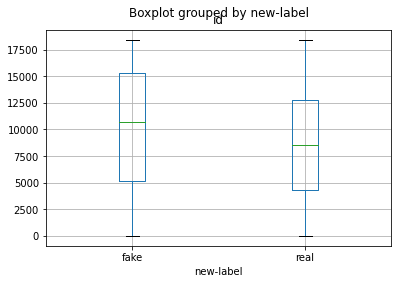

In [ ]:
overall_dataExplore.boxplot(column='id',by='new-label')

### CON'T

### Saving the test and train from both Liar and FakeNewsNet into its respective dataframe

### Also, saving all dataframes into an overall dataframe for visualization 

In [ ]:
print("Test Count", test.count())
print("Train Count", train.count())
print("Overall Count", overall.count())

Test Count id                         4643
date                       4643
speaker                    4643
statement                  4643
sources                    4643
paragraph_based_content    4643
fullText_based_content     4643
label_fnn                  2112
label                      4643
label-liar                 2531
dtype: int64
Train Count id                         30264
date                       30264
speaker                    30264
statement                  30264
sources                    30264
paragraph_based_content    30264
fullText_based_content     30264
label_fnn                  15212
label                      30264
label-liar                 15052
dtype: int64
Overall Count id                         34907
date                       34907
speaker                    34907
statement                  34907
sources                    34907
paragraph_based_content    34907
fullText_based_content     34907
label_fnn                  17324
label                  

In [ ]:
overall.statement

0       A national organization says Georgia has one o...
1       Says Barack Obama's health care law "will be t...
2       Says the Southwest Florida Water Management Di...
3       "The Congressional Budget Office has this econ...
4       Says the Treasury Department "says 41 percent ...
                              ...                        
1260    Says former Sen. Rick Santorum said, "Sometime...
1261    "Intensifying Hurricane Willa headed directly ...
1262    Says Hillary Clinton "laid the groundwork" for...
1263         "Paul Workman wants to raise the sales tax."
1264    "There have been 30 published polls in this el...
Name: statement, Length: 34907, dtype: object

In [ ]:
overall.paragraph_based_content

0       ['A coalition of government watchdog groups la...
1       ['As Supreme Court justices embarked on three ...
2       ["Here's a new one: The Senate budget committe...
3       ['Recently, House Budget chairman Paul Ryan, R...
4       ['The millionaires’ tax proposal made its late...
                              ...                        
1260    ['Former Pennsylvania Sen. Rick Santorum has b...
1261    ['A headline on a site called Patriotic Expres...
1262    ['Despite a rocky past with the Clintons , Sen...
1263    ['The run-up to Nov. 2 is full of frightful st...
1264    ['U.S. Sen. Bob Bennett of Utah, the Republica...
Name: paragraph_based_content, Length: 34907, dtype: object

In [ ]:
overall.fullText_based_content

0       A coalition of government watchdog groups last...
1       As Supreme Court justices embarked on three da...
2       Here's a new one: The Senate budget committee ...
3       Recently, House Budget chairman Paul Ryan, R-W...
4       The millionaires’ tax proposal made its latest...
                              ...                        
1260    Former Pennsylvania Sen. Rick Santorum has bee...
1261    A headline on a site called Patriotic Express ...
1262    Despite a rocky past with the Clintons , Sen. ...
1263    The run-up to Nov. 2 is full of frightful stat...
1264    U.S. Sen. Bob Bennett of Utah, the Republican ...
Name: fullText_based_content, Length: 34907, dtype: object

In [ ]:
train['text'] = train['statement'] + " " + train['fullText_based_content']
del train['statement']
del train['fullText_based_content']
del train['id']
del train['date']
del train['speaker']
del train['sources']
del train['paragraph_based_content']
del train['label_fnn']
del train['label-liar']
train.head(5)

,label,text
0,0,A national organization says Georgia has one o...
1,0,"Says Barack Obama's health care law ""will be t..."
2,0,Says the Southwest Florida Water Management Di...
3,1,"""The Congressional Budget Office has this econ..."
4,0,"Says the Treasury Department ""says 41 percent ..."


In [ ]:
test['text'] = test['statement'] + " " + test['fullText_based_content']
del test['statement']
del test['fullText_based_content']
del test['id']
del test['date']
del test['speaker']
del test['sources']
del test['paragraph_based_content']
del test['label_fnn']
del test['label-liar']
test.head(5)

,label,text
0,1,"""President Obama himself attempted to filibust..."
1,1,"In Hawaii, ""they don't have a history of throw..."
2,1,"""Our national debt ... is on track to exceed t..."
3,1,"""Health insurance companies' costs are only 4 ..."
4,1,"""We can prevent terror suspects from boarding ..."


In [ ]:
overall['text'] = overall['statement'] + " " + overall['fullText_based_content']
del overall['statement']
del overall['fullText_based_content']
del overall['id']
del overall['date']
del overall['speaker']
del overall['sources']
del overall['paragraph_based_content']
del overall['label_fnn']
del overall['label-liar']
overall.head(5)

,label,text
0,0,A national organization says Georgia has one o...
1,0,"Says Barack Obama's health care law ""will be t..."
2,0,Says the Southwest Florida Water Management Di...
3,1,"""The Congressional Budget Office has this econ..."
4,0,"Says the Treasury Department ""says 41 percent ..."


In [ ]:
overall.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
overall.set_index(["label", "text"]).count(level="text")

""
text
"""#Broward elections department history violating law."" Florida headed toward multiple recounts, U.S. Sen. Marco Rubio, R-Fla., went Twitter tear directed Broward Supervisor Elections Brenda Snipes. Rubio took aim supervisor one Florida’s blue bastions county still tabulating ballots 40 hours polls closed. Big races U.S. Senate, governor state agriculture commissioner hung balance. #Broward elections department history violating law,"" Rubio tweeted Nov. 8, linking Politico articles two lawsuits filed office since 2016. Hours later, yet another lawsuit filed Snipes, time Gov. Rick Scott, Republican U.S. Senate candidate. Broward judge ruled Scott’s favor found Snipes violation Florida public records laws fulfilling record’s request Scott’s campaign. Rubio right Broward’s past election problems? Former Gov. Jeb Bush appointed Snipes, former school principal, replace Miriam Oliphant. Oliphant removed office amid mismanagement 2003 following string problems 2002 primary election. Snipes initially drew praise cleaning office repeatedly re-election. recent years, faced scrutiny competence amid series lawsuits, errors sluggish vote counting Broward’s left-leaning electorate key statewide races second-largest number registered voters nearly 1.2 million behind Miami Dade. Lawsuits filed Broward Supervisor Elections lawsuits Rubio cited filed 2017. Snipes lost lawsuits appealed them. One lawsuit filed Tim Canova lost Democratic primary U.S. Rep. Debbie Wasserman Schultz 2016. Canova, concerned integrity election, wanted inspect paper ballots lost. said refused comply, sued. Snipes testified office destroyed ballots signed order Sept. 1, 2017 authorize destruction boxes. federal law, ballots supposed preserved 22 months. Broward Judge Raag Singhal ruled May Snipes, finding ""premature destruction records unlawful violation Public Records Act."" Following ruling, state announced would send election experts monitor office. lawsuit filed Republican Party Florida 2017 pertained Snipes’ procedures opening mail-in ballots. GOP poll watchers said 2016 office opened mail ballots private. August 2018 primary, Singhal issued declaratory injunction prevented Snipes opening ballots county’s Canvassing Board met. However, Singhal wrote lawsuit pertained handling ballots future elections, whether Snipes violated state law past elections. sent judges’ findings lawsuits experts elections law government. Chris Sautter, recount expert adjunct lecturer American University said Canova case, ""destroying ballots clearly violates federal law."" respect Republican Party Florida case, declaratory injunctions common remedy courts use compel public officials perform duties performing, Sautter said. Nova Southeastern University law professor Bob Jarvis said Singhal’s injunction issued prevent future violations. ""That’s injunctions typically – prevent law-breaking,"" said. times court, Snipes prevailed. 2016, Broward judge found harm done handful voters initially received absentee ballots omitted amendment legalize medical marijuana. Snipes offered replacement ballots voters. April, federal judge sided Snipes lawsuit brought American Civil Rights Union conservative group. judge concluded Snipes made reasonable efforts purge ineligible voters rolls. Broward elections problems didn’t result litigation, county election website posted results 30 minutes polls closed 2016 primary. VR Systems, contractor elections supervisor, took responsibility. Broward prosecutors declined file charges finding essentially mistake. Snipes respond request comment."
"""#Business formation still rise Ohio! far 2011 we’ve assisted w/ 44,443 new business filings."" Ohio politicians made job creation top priority talking point. Gov. John Kasich, instance, runs nearly every policy proposal jobs filter frequently cites belief state must business friendly spur job growth. Even Secretary State Jon Husted wants public know keeping close eye jobs, issue fellow Republicans successfully h

## Further Data Visualization and Data Cleaning

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dataframe count of Fake vs. Real News')

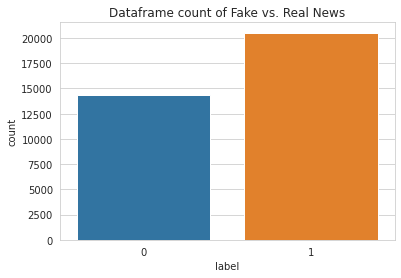

In [ ]:
sns.set_style("whitegrid")
sns.countplot(overall.label).set_title("Dataframe count of Fake vs. Real News")

In [ ]:
overall.label.value_counts()

1    20529
0    14378
Name: label, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
overall['text']=overall['text'].apply(denoise_text)
train['text']=train['text'].apply(denoise_text)
test['text']=test['text'].apply(denoise_text)

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(overall.text)

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'--': 73159,
 'also': 46030,
 'one': 46393,
 'people': 45701,
 'percent': 67815,
 'said': 118689,
 'said.': 47804,
 'state': 59365,
 'tax': 50362,
 'would': 89042}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

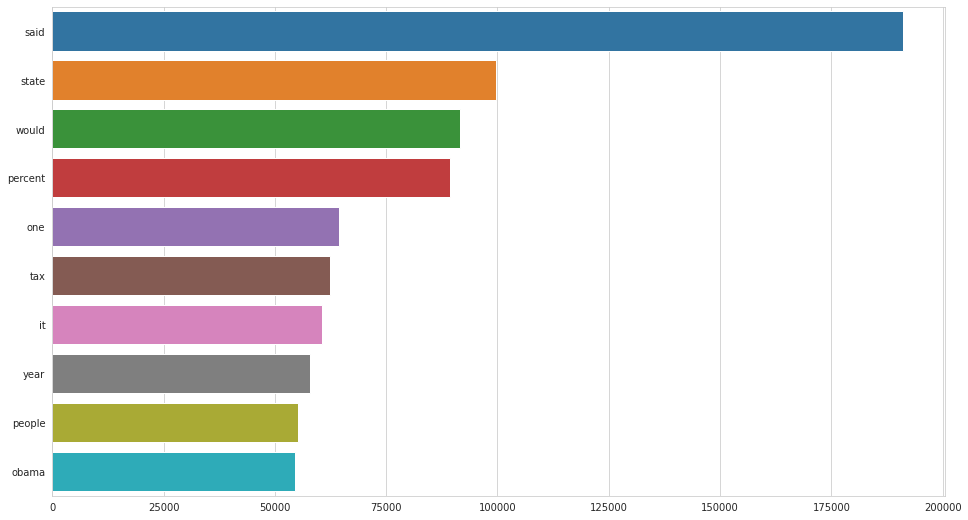

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(overall.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()),y = list(most_common_uni.keys()))

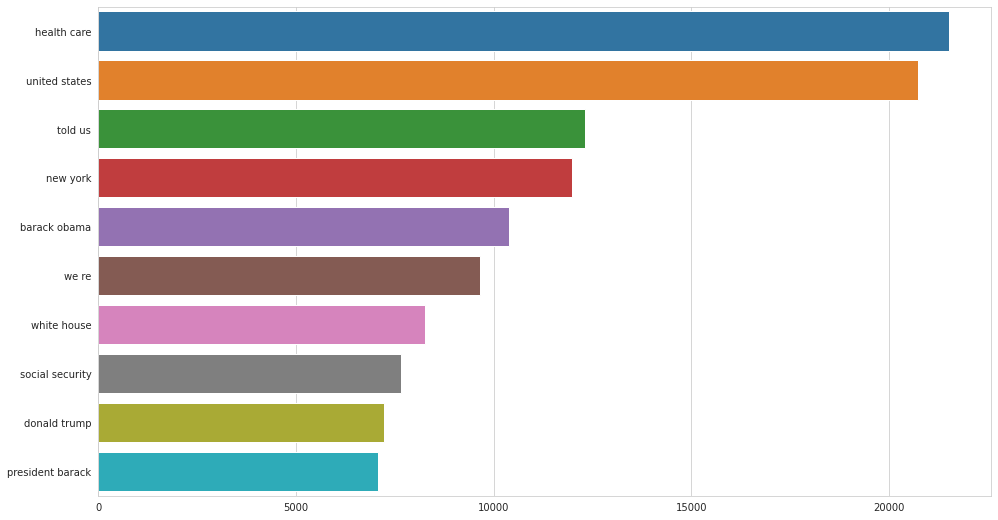

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(overall.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()),y = list(most_common_bi.keys()))

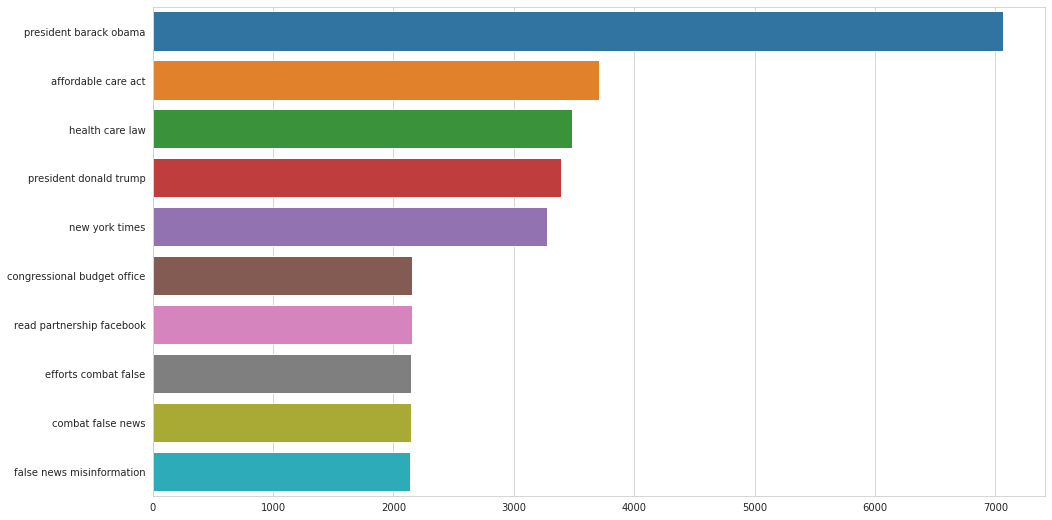

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(overall.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x = list(most_common_tri.values()),y = list(most_common_tri.keys()))

# Spliting Training and Testing Data

In [ ]:
print('Train Count', train.count())
print('Test Count', test.count())

Train Count label    30264
text     30264
dtype: int64
Test Count label    4643
text     4643
dtype: int64


In [ ]:
x_train = train.text
y_train = train.label
x_test = test.text
y_test = test.label

In [ ]:
print('Train Content', x_train.count())
print('Train Labels', y_train.count())
print('Test Content', x_test.count())
print('Test Labels', y_test.count())

Train Content 30264
Train Labels 30264
Test Content 4643
Test Labels 4643


# Tokenization and Max Padding


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence

In [ ]:
maxvocab = 0000
maxlen = 300

In [ ]:
tokenizer = text.Tokenizer(num_words=maxvocab)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)
tokenized_test = tokenizer.texts_to_sequences(x_test)
x_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

# Global Vectors for Word Representation (Glove)

source: https://www.kaggle.com/bertcarremans/glovetwitter27b100dtxt

In [ ]:
EMBEDDING_FILE = '/content/dataset/glove.twitter.27B.100d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(maxvocab, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= maxvocab: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


# Model Training

## Training Glove Model

In [ ]:
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()
model.add(Embedding(maxvocab, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
batch_size = 256
epochs = 100
embed_size = 100

#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=1e-4,
  decay_steps=1000,
  decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=1e-3, restore_best_weights=True)

#start the training
history = model.fit(x_train, 
                    y_train, 
                    batch_size = batch_size , 
                    validation_data = (x_test,y_test) , 
                    epochs = epochs , 
                    callbacks = callback,
                    verbose = 1)

Epoch 1/100
119/119 [==============================] - 226s 2s/step - loss: 0.6569 - accuracy: 0.6106 - val_loss: 0.5862 - val_accuracy: 0.7062
Epoch 2/100
119/119 [==============================] - 223s 2s/step - loss: 0.6258 - accuracy: 0.6561 - val_loss: 0.5745 - val_accuracy: 0.7222
Epoch 3/100
119/119 [==============================] - 223s 2s/step - loss: 0.6162 - accuracy: 0.6626 - val_loss: 0.5495 - val_accuracy: 0.7405
Epoch 4/100
119/119 [==============================] - 221s 2s/step - loss: 0.6137 - accuracy: 0.6642 - val_loss: 0.5489 - val_accuracy: 0.7379
Epoch 5/100
119/119 [==============================] - 220s 2s/step - loss: 0.6280 - accuracy: 0.6532 - val_loss: 0.5731 - val_accuracy: 0.7172
Epoch 6/100
119/119 [==============================] - 220s 2s/step - loss: 0.6162 - accuracy: 0.6632 - val_loss: 0.5545 - val_accuracy: 0.7308
Epoch 7/100
119/119 [==============================] - 224s 2s/step - loss: 0.6097 - accuracy: 0.6689 - val_loss: 0.5493 - val_accuracy:

In [ ]:
model.save("glove.h5")

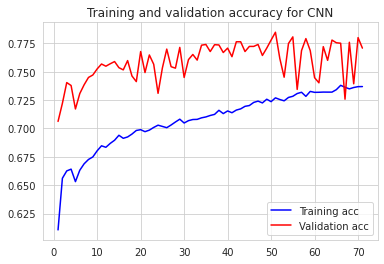

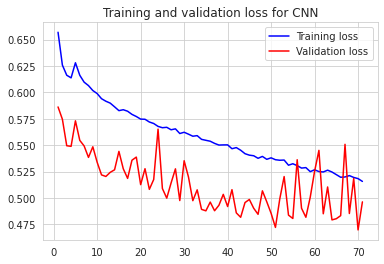

In [ ]:
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

## Training Bidirectional Model

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model = Sequential()
model.add(Embedding(maxvocab, 32))
model.add(Bidirectional(LSTM(64,  return_sequences=True)))
model.add(Bidirectiornal(LSTM(16)))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=1e-4,
  decay_steps=1000,
  decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
________________________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=1e-3, restore_best_weights=True)

history = model.fit(x_train, 
                    y_train, 
                    epochs = 100, 
                    validation_data=(x_test,y_test), 
                    batch_size = 256,
                    shuffle=True, 
                    callbacks=callback,
                    verbose = 1)

Epoch 1/100
119/119 [==============================] - 10s 82ms/step - loss: 0.6834 - accuracy: 0.5848 - val_loss: 0.6514 - val_accuracy: 0.6420
Epoch 2/100
119/119 [==============================] - 8s 66ms/step - loss: 0.6521 - accuracy: 0.6261 - val_loss: 0.5994 - val_accuracy: 0.6690
Epoch 3/100
119/119 [==============================] - 8s 67ms/step - loss: 0.6022 - accuracy: 0.6934 - val_loss: 0.5403 - val_accuracy: 0.7428
Epoch 4/100
119/119 [==============================] - 8s 67ms/step - loss: 0.5778 - accuracy: 0.7075 - val_loss: 0.5368 - val_accuracy: 0.7609
Epoch 5/100
119/119 [==============================] - 8s 68ms/step - loss: 0.5418 - accuracy: 0.7351 - val_loss: 0.5237 - val_accuracy: 0.7342
Epoch 6/100
119/119 [==============================] - 8s 68ms/step - loss: 0.5206 - accuracy: 0.7631 - val_loss: 0.4872 - val_accuracy: 0.7693
Epoch 7/100
119/119 [==============================] - 8s 68ms/step - loss: 0.4834 - accuracy: 0.7910 - val_loss: 0.4841 - val_accuracy

In [ ]:
model.save("bidirect.h5")

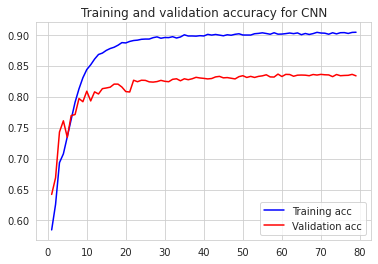

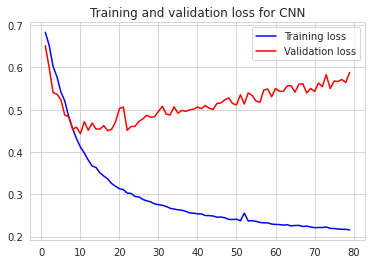

In [ ]:
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

## Training CNN Model

In [ ]:
model = Sequential()
model.add(Embedding(maxvocab, 32, input_length=maxlen))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=1e-4,
  decay_steps=1000,
  decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 150, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               1200250   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 1,523,605
Trainable params: 1,523,605
Non-trainable params: 0
____________________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=1e-3, restore_best_weights=True)

#start the training
history = model.fit(x_train, 
                    y_train, 
                    batch_size = 256, 
                    validation_data = (x_test,y_test), 
                    epochs = 100, 
                    callbacks = callback,
                    verbose = 1)

Epoch 1/100
119/119 [==============================] - 2s 13ms/step - loss: 0.6690 - accuracy: 0.6004 - val_loss: 0.6380 - val_accuracy: 0.6539
Epoch 2/100
119/119 [==============================] - 1s 12ms/step - loss: 0.6332 - accuracy: 0.6363 - val_loss: 0.5726 - val_accuracy: 0.7301
Epoch 3/100
119/119 [==============================] - 1s 12ms/step - loss: 0.5610 - accuracy: 0.7180 - val_loss: 0.5180 - val_accuracy: 0.7493
Epoch 4/100
119/119 [==============================] - 1s 12ms/step - loss: 0.4892 - accuracy: 0.7691 - val_loss: 0.4471 - val_accuracy: 0.8042
Epoch 5/100
119/119 [==============================] - 1s 12ms/step - loss: 0.4253 - accuracy: 0.8133 - val_loss: 0.4343 - val_accuracy: 0.8070
Epoch 6/100
119/119 [==============================] - 1s 12ms/step - loss: 0.3746 - accuracy: 0.8417 - val_loss: 0.4014 - val_accuracy: 0.8212
Epoch 7/100
119/119 [==============================] - 1s 12ms/step - loss: 0.3308 - accuracy: 0.8648 - val_loss: 0.3992 - val_accuracy:

In [ ]:
model.save("cnn.h5")

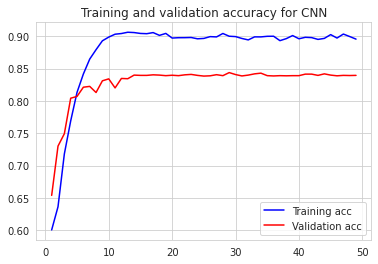

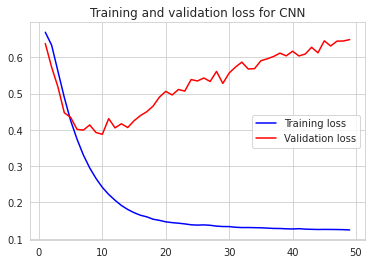

In [ ]:
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

# Model Testing 

## Testing Glove Model

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('glove.h5')
pred = model.predict(x_test)

predictions = []

for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0) 

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
glove_accuracy_score = accuracy_score(predictions, y_test)
glove_precision_score = precision_score(predictions, y_test)
glove_recall_score = recall_score(predictions, y_test)
glove_f1_score = f1_score(predictions, y_test)

print('Accuracy on testing set:', glove_accuracy_score)
print('Precision on testing set:', glove_precision_score)
print('Recall on testing set:', glove_recall_score)
print('F1 on testing set:', glove_f1_score)

Accuracy on testing set: 0.7848373896187809
Precision on testing set: 0.9350561033662019
Recall on testing set: 0.7729061270376616
F1 on testing set: 0.8462840436990305


In [ ]:
confusion_matrix(predictions, y_test)

array([[ 894,  191],
       [ 808, 2750]])

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

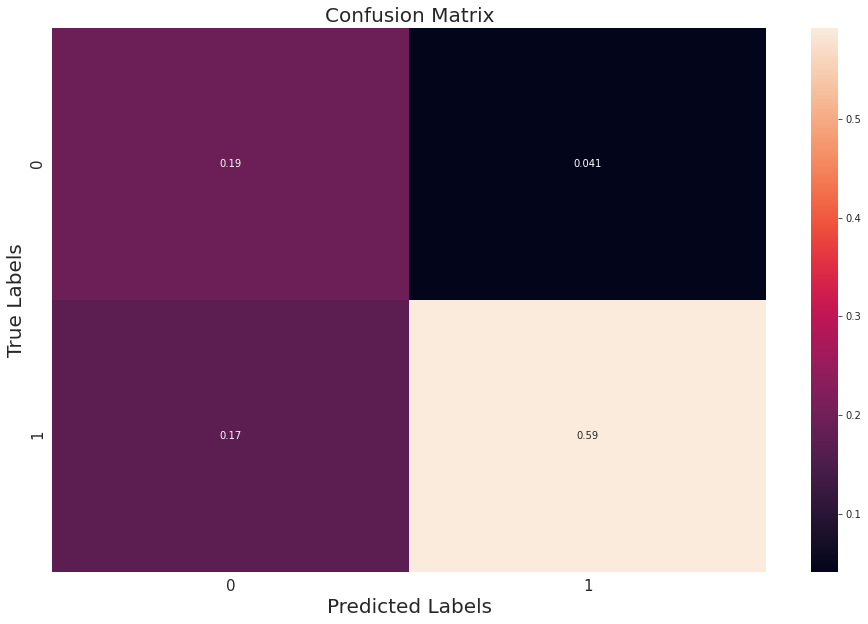

In [ ]:
matrix = confusion_matrix(predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

## Testing Bidirectional Model

In [ ]:
model = keras.models.load_model('bidirect.h5')
pred = model.predict(x_test)

predictions = []

for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0) 

In [ ]:
bidirect_accuracy_score = accuracy_score(predictions, y_test)
bidirect_precision_score = precision_score(predictions, y_test)
bidirect_recall_score = recall_score(predictions, y_test)
bidirect_f1_score = f1_score(predictions, y_test)

print('Accuracy on testing set:', bidirect_accuracy_score)
print('Precision on testing set:', bidirect_precision_score)
print('Recall on testing set:', bidirect_recall_score)
print('F1 on testing set:', bidirect_f1_score)

Accuracy on testing set: 0.8363127288391127
Precision on testing set: 0.8408704522271336
Recall on testing set: 0.8943942133815551
F1 on testing set: 0.8668068699614441


In [ ]:
confusion_matrix(predictions, y_test)

array([[1410,  468],
       [ 292, 2473]])

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

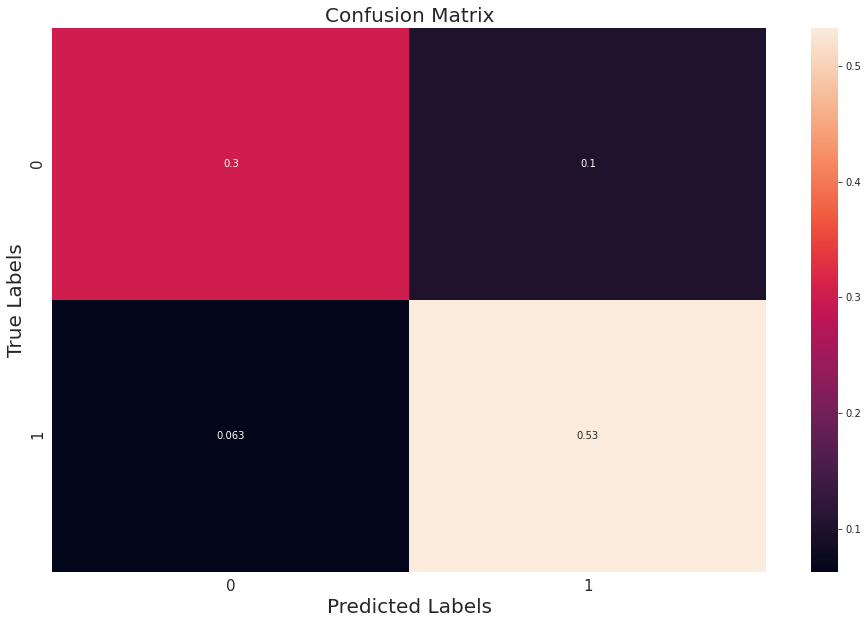

In [ ]:
matrix = confusion_matrix(predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

## Testing CNN Model

In [ ]:
model = keras.models.load_model('cnn.h5')
pred = model.predict(x_test)

predictions = []

for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0) 

In [ ]:
cnn_accuracy_score = accuracy_score(predictions, y_test)
cnn_precision_score = precision_score(predictions, y_test)
cnn_recall_score = recall_score(predictions, y_test)
cnn_f1_score = f1_score(predictions, y_test)

print('Accuracy on testing set:', cnn_accuracy_score)
print('Precision on testing set:', cnn_precision_score)
print('Recall on testing set:', cnn_recall_score)
print('F1 on testing set:', cnn_f1_score)

Accuracy on testing set: 0.8438509584320483
Precision on testing set: 0.8456307378442707
Recall on testing set: 0.9017403915881074
F1 on testing set: 0.8727846990700124


In [ ]:
confusion_matrix(predictions, y_test)

array([[1431,  454],
       [ 271, 2487]])

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

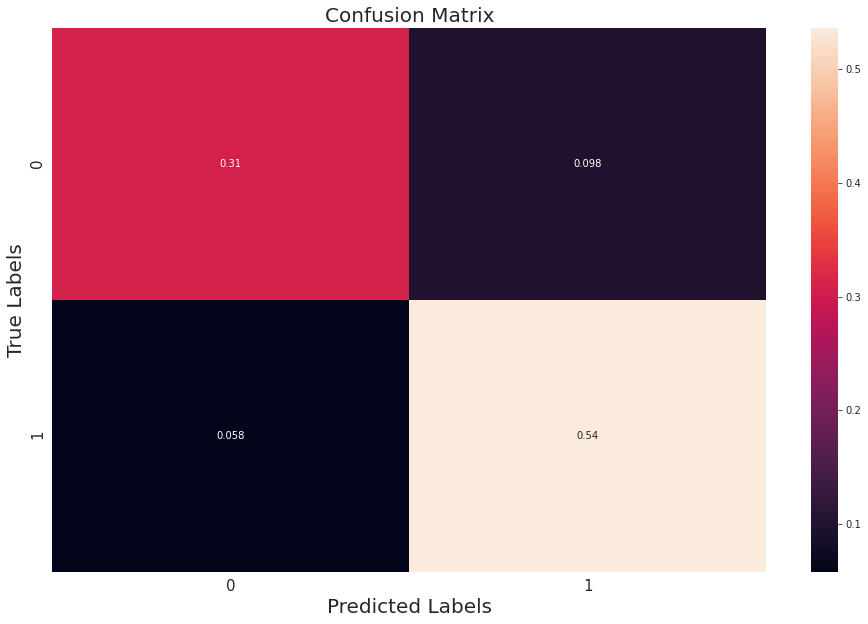

In [ ]:
matrix = confusion_matrix(predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

# Summary

In [ ]:
summary = pd.DataFrame({"Glove":[glove_accuracy_score,glove_precision_score,glove_recall_score,glove_f1_score],
                   "Bidirectional":[bidirect_accuracy_score,bidirect_precision_score,bidirect_recall_score,bidirect_f1_score],
                   "CNN":[cnn_accuracy_score,cnn_precision_score,cnn_recall_score,cnn_f1_score]})
summary.index = ['Accuracy', 'Precision', 'Recall','F1'] 

In [ ]:
summary

,Glove,Bidirectional,CNN
Accuracy,0.784837,0.836313,0.843851
Precision,0.935056,0.840870,0.845631
Recall,0.772906,0.894394,0.901740
F1,0.846284,0.866807,0.872785


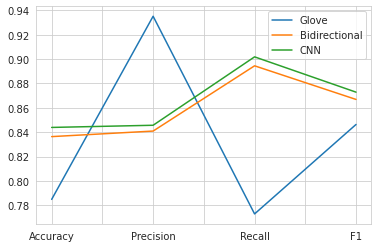

In [ ]:
summary.plot.line()

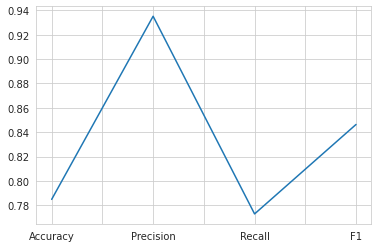

In [ ]:
summary['Glove'].plot.line()

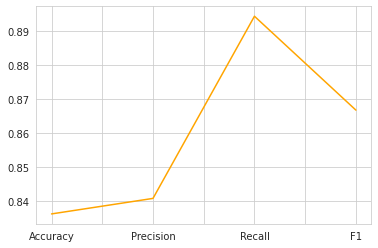

In [ ]:
summary['Bidirectional'].plot(color='orange')

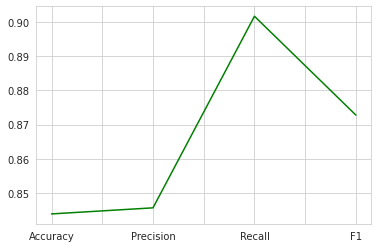

In [ ]:
summary['CNN'].plot(color='green')

In [ ]:
summary_transpose = summary.T
summary_transpose

,Accuracy,Precision,Recall,F1
Glove,0.784837,0.935056,0.772906,0.846284
Bidirectional,0.836313,0.840870,0.894394,0.866807
CNN,0.843851,0.845631,0.901740,0.872785


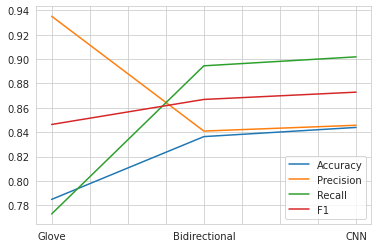

In [ ]:
summary_transpose.plot.line()

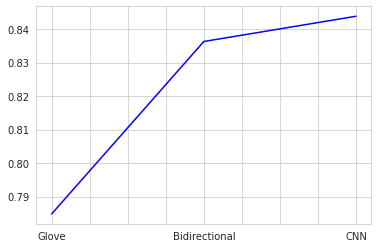

In [ ]:
summary_transpose['Accuracy'].plot(color='blue')

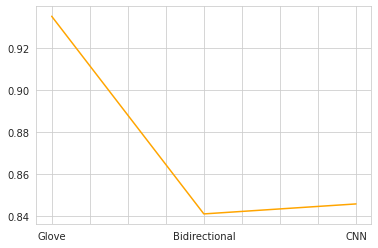

In [ ]:
summary_transpose['Precision'].plot(color='orange')

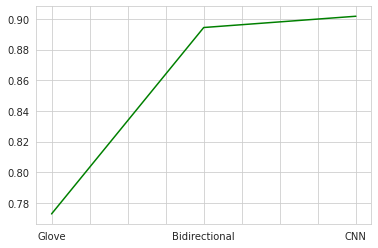

In [ ]:
summary_transpose['Recall'].plot(color='green')

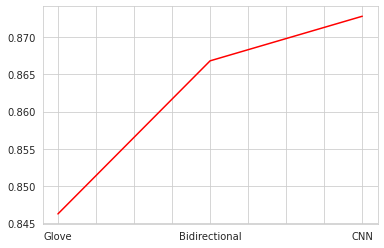

In [ ]:
summary_transpose['F1'].plot(color='red')